### Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Dropout,Input
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.utils.vis_utils import plot_model

### Reading Data

In [44]:
df=pd.read_csv('../input/bokachoda/state_wise_daily.csv')
df

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,02-Jan-21,2021-01-02,Recovered,20903,7,279,10,80,490,117,...,315,890,13,1007,535,16,1190,463,1443,0
884,02-Jan-21,2021-01-02,Deceased,216,0,3,0,2,3,1,...,15,5,1,11,2,0,8,7,28,0
885,03-Jan-21,2021-01-03,Confirmed,16678,1,232,5,15,282,16,...,207,502,9,867,394,6,737,267,896,0
886,03-Jan-21,2021-01-03,Recovered,19658,9,352,7,60,631,54,...,263,801,33,1002,574,14,1179,244,1432,0


In [45]:
df_confirmed=df[df['Status']=='Confirmed']

In [47]:
df_pos=df_confirmed[['GJ','TN','KL','AP','PB']]

In [48]:
df_pos

,GJ,TN,KL,AP,PB
0,0,1,19,1,1
3,0,0,5,0,0
6,0,0,3,0,0
9,0,0,0,0,0
12,0,1,0,0,1
...,...,...,...,...,...
873,799,945,6268,349,361
876,780,937,5215,338,283
879,734,921,4991,326,248
882,741,910,5328,238,242


### Function to create time series data for RNN

In [49]:
def dataset(X,timesteps):
  x=[]
  y=[]
  for i in range(0,len(X)-1-timesteps):
    x.append(X[i:i+timesteps,0])
    y.append(X[i+timesteps,0])
  return np.array(x),np.array(y)


## Model forTamil Nadu

In [50]:
X_model=df_pos['TN'].values.reshape(296,1)
X_train_model=X_model[:250,:]
X_val=X_model[250:,:]
#plt.plot(X_train,c='b')

scaler_model=MinMaxScaler(feature_range=(0,1))
scaler1=MinMaxScaler(feature_range=(0,1))

X_train_model=scaler_model.fit_transform(X_train_model)
X_val=scaler1.fit_transform(X_val)

X_tr_model,Y_tr_model=dataset(X_train_model,7)
X_tr_model=X_tr_model.reshape(X_tr_model.shape[0],X_tr_model.shape[1],1)
    
X_te,Y_te=dataset(X_val,7)

X_te=X_te.reshape(X_te.shape[0],X_te.shape[1],1)
Y_te=Y_te.reshape(Y_te.shape[0],1)
#return X_tr,Y_tr,X_te,Y_te
print(X_tr_model.shape,X_te.shape)

(242, 7, 1) (38, 7, 1)


In [51]:
model_tn=Sequential()
model_tn.add(LSTM(100,activation='relu',input_shape=(X_tr_model.shape[1],X_tr_model.shape[2]),return_sequences=True))
model_tn.add(LSTM(100,activation='relu'))
model_tn.add(Dense(1,activation='linear'))
print(model_tn.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 100)            40800     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


### Model Architecture

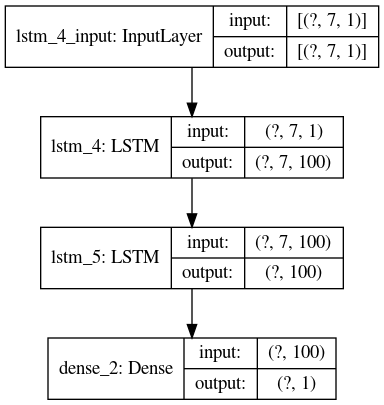

In [52]:
plot_model(model_tn,show_shapes=True)

In [53]:
model_tn.compile(optimizer='rmsprop',loss='mse')

In [54]:
hist=model_tn.fit(X_tr_model,Y_tr_model,epochs=100,batch_size=8)

Epoch 1/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0531
Epoch 2/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0074
Epoch 3/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0054
Epoch 4/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0071
Epoch 5/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0047
Epoch 6/100
31/31 [==============================] - 1s 24ms/step - loss: 0.0057
Epoch 7/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0057
Epoch 8/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0051
Epoch 9/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0047
Epoch 10/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0052
Epoch 11/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0052
Epoch 12/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0045
Epoch 13/100
31/31 [=====

### Loss plot

Text(0, 0.5, 'Loss')

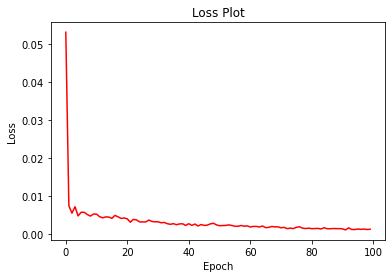

In [55]:
plt.plot(hist.history['loss'],c='r')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [56]:
Y_pred_model=model_tn.predict(X_te)
if(Y_te.ndim==1):
    Y_te=Y_te.reshape(Y_te.shape[0],1)
print(Y_te.shape)


Y_prediction_model=scaler1.inverse_transform(Y_pred_model)
Y_te1=scaler1.inverse_transform(Y_te)

(38, 1)


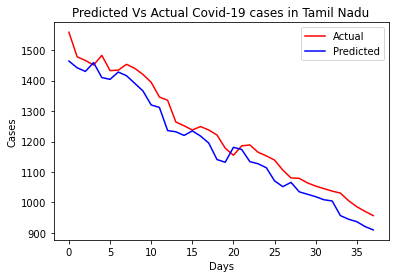

In [57]:
plt.plot(Y_prediction_model,c='r',label='Actual')
plt.plot(Y_te1,c='b',label='Predicted')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Predicted Vs Actual Covid-19 cases in Tamil Nadu')
plt.legend()

In [58]:
print('Mean Absolute Error : ',round(mean_absolute_error(Y_prediction_model,Y_te1),2))
print('Root Mean Squared Error :',round(np.sqrt(mean_squared_error(Y_prediction_model,Y_te1)),2))

Mean Absolute Error :  43.95
Root Mean Squared Error : 49.29


Similarly models for other states can be trained